<a href="https://colab.research.google.com/github/Cynthiaudoye/Forex_Trading_Bot/blob/main/Cynthia's_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler


In [ ]:
# Reading the data into the dataframe
fx_df = pd.read_csv("/content/GBPUSD_HistoricalData.csv")

# Displaying the first few rows
fx_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2003-12-01,1.723811,1.727205,1.718390,1.718597,1.718597,0.0
1,2003-12-02,1.719010,1.732112,1.717298,1.730313,1.730313,0.0
2,2003-12-03,1.730493,1.731812,1.725209,1.728101,1.728101,0.0
3,2003-12-04,1.727414,1.728997,1.718302,1.720697,1.720697,0.0
4,2003-12-05,1.720608,1.733102,1.719809,1.733102,1.733102,0.0


In [ ]:
# Displaying the last few rows
fx_df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
5343,2024-05-23,1.272087,1.274697,1.270616,1.272103,1.272103,0.0
5344,2024-05-24,1.269374,1.275136,1.268279,1.269406,1.269406,0.0
5345,2024-05-27,1.273447,1.277900,1.273447,1.273610,1.273610,0.0
5346,2024-05-28,1.277270,1.279984,1.276308,1.277237,1.277237,0.0
5347,2024-05-29,1.276000,1.277172,1.270713,1.275836,1.275836,0.0


In [ ]:
# Retrieving the number of rows and columns in the dataset
rows, columns = fx_df.shape
rows, columns

(5348, 7)

In [ ]:
# Generating summary statistics for the dataset
summary_stats = fx_df.describe()
summary_stats

,Open,High,Low,Close,Adj Close,Volume
count,5331.000000,5331.000000,5331.000000,5331.000000,5331.000000,5331.0
mean,1.534185,1.539940,1.528029,1.534222,1.534222,0.0
std,0.239738,0.240472,0.239447,0.239771,0.239771,0.0
min,1.072846,1.083541,0.637389,1.072754,1.072754,0.0
25%,1.309955,1.314311,1.305364,1.310049,1.310049,0.0
50%,1.536098,1.542829,1.530339,1.536169,1.536169,0.0
75%,1.681011,1.684409,1.678402,1.680983,1.680983,0.0
max,2.108415,2.115820,2.098812,2.108192,2.108192,0.0


In [ ]:
# Getting an overview of the DataFrame structure, data types, and detect missing values
fx_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5348 entries, 0 to 5347
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       5348 non-null   object 
 1   Open       5331 non-null   float64
 2   High       5331 non-null   float64
 3   Low        5331 non-null   float64
 4   Close      5331 non-null   float64
 5   Adj Close  5331 non-null   float64
 6   Volume     5331 non-null   float64
dtypes: float64(6), object(1)
memory usage: 292.6+ KB


In [ ]:
# Just to reconfirm the missing values in dataframe
fx_df.isnull().sum()

Date          0
Open         17
High         17
Low          17
Close        17
Adj Close    17
Volume       17
dtype: int64

In [ ]:
# Filtering out the rows that contain null values
null_rows = fx_df[fx_df.isnull().any(axis=1)]
null_rows

,Date,Open,High,Low,Close,Adj Close,Volume
238,2004-10-28,NaN,NaN,NaN,NaN,NaN,NaN
472,2005-09-21,NaN,NaN,NaN,NaN,NaN,NaN
985,2007-09-10,NaN,NaN,NaN,NaN,NaN,NaN
1040,2007-11-26,NaN,NaN,NaN,NaN,NaN,NaN
1056,2007-12-18,NaN,NaN,NaN,NaN,NaN,NaN
1057,2007-12-19,NaN,NaN,NaN,NaN,NaN,NaN
1079,2008-01-18,NaN,NaN,NaN,NaN,NaN,NaN
1080,2008-01-21,NaN,NaN,NaN,NaN,NaN,NaN
1081,2008-01-22,NaN,NaN,NaN,NaN,NaN,NaN
1131,2008-04-01,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Removing rows with the NaN values, 'Volume' and 'Adj Close' columns and reconfirming number of rows and columns in the dataset
fx_cleaned_df = fx_df.dropna()
fx_cleaned_df = fx_cleaned_df.drop(columns=['Volume', 'Adj Close'])

fx_cleaned_df.shape

(5331, 5)

In [ ]:
# Convert the date column to datetime format
fx_cleaned_df['Date'] = pd.to_datetime(fx_cleaned_df['Date'])

In [ ]:
fx_cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5331 entries, 0 to 5347
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    5331 non-null   datetime64[ns]
 1   Open    5331 non-null   float64       
 2   High    5331 non-null   float64       
 3   Low     5331 non-null   float64       
 4   Close   5331 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 249.9 KB


In [ ]:
# Displaying the first few rows of the cleaned dataframe
fx_cleaned_df.head()

,Date,Open,High,Low,Close
0,2003-12-01,1.723811,1.727205,1.718390,1.718597
1,2003-12-02,1.719010,1.732112,1.717298,1.730313
2,2003-12-03,1.730493,1.731812,1.725209,1.728101
3,2003-12-04,1.727414,1.728997,1.718302,1.720697
4,2003-12-05,1.720608,1.733102,1.719809,1.733102


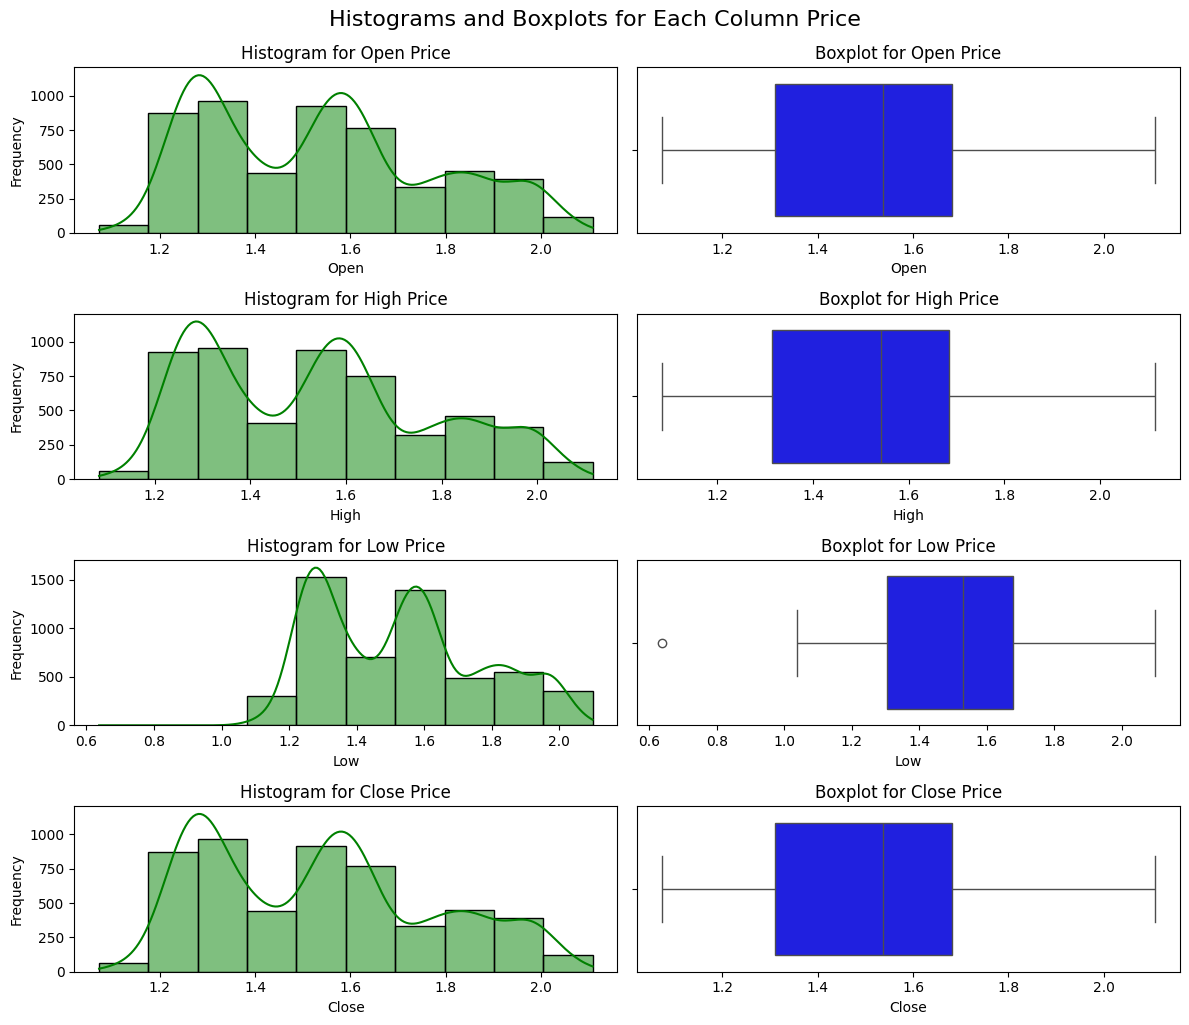

In [ ]:
# Creating a figure and a grid of subplots
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(12, 10))

# Defining the columns for histograms
numeric_columns = ['Open', 'High', 'Low', 'Close']

# Flattening the axes array for easy iteration
axes = axes.flatten()

# Looping through the numeric columns and then creating a histogram and boxplot for each
for i, col in enumerate(numeric_columns):
    sns.histplot(fx_cleaned_df[col], kde=True, color='green', bins=10, ax=axes[2*i])
    axes[2*i].set_xlabel(col.capitalize())
    axes[2*i].set_ylabel('Frequency')
    axes[2*i].set_title(f"Histogram for {col.capitalize()} Price")


    sns.boxplot(x=fx_cleaned_df[col], ax=axes[2*i+1], color='blue')
    axes[2*i+1].set_xlabel(col.capitalize())
    axes[2*i+1].set_title(f"Boxplot for {col.capitalize()} Price")

# Adjusting layout for better spacing between plots
plt.tight_layout()

# Adding main title for the entire figure
plt.suptitle("Histograms and Boxplots for Each Column Price", fontsize=16, y=1.02)

# Displaying the plot
plt.show()

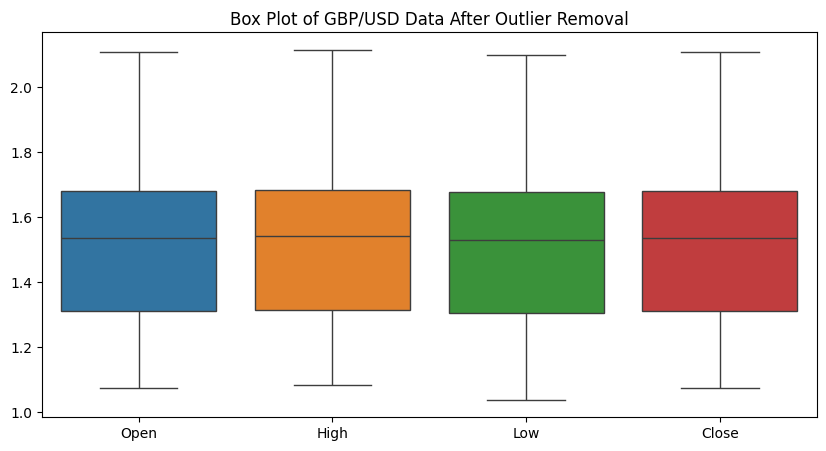

In [ ]:
# Defining a function to remove outliers using IQR
def remove_outliers_iqr(fx_cleaned_df, columns):

  """
    Removes outliers from specified columns in a DataFrame using the IQR method.

    Parameters:
    fx_cleaned_df: The DataFrame containing the data.
    columns (list): A list of column names from which to remove outliers.

    Returns:
    fx_cleaned_df2: A new DataFrame with outliers removed from the specified columns.
    """

  for column in columns:
        Q1 = fx_cleaned_df[column].quantile(0.25)
        Q3 = fx_cleaned_df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        fx_cleaned_df = fx_cleaned_df[(fx_cleaned_df[column] >= lower_bound) & (fx_cleaned_df[column] <= upper_bound)]
  return fx_cleaned_df

# Applying the function to the price columns
price_columns = ['Open', 'High', 'Low', 'Close']
fx_cleaned_df2 = remove_outliers_iqr(fx_cleaned_df, price_columns)

# Visualizing the data after removing outliers
plt.figure(figsize=(10, 5))
sns.boxplot(data=fx_cleaned_df2[price_columns])
plt.title('Box Plot of GBP/USD Data After Outlier Removal')
plt.show()

In [ ]:
# Retrieving the number of rows and columns in the new dataframe after removing outliers
rows, columns = fx_cleaned_df2.shape
rows, columns

(5330, 5)

In [ ]:
# Generating summary statistics for the new GBP/USD data
summary_stats = fx_cleaned_df2.describe()
summary_stats

,Date,Open,High,Low,Close
count,5330,5330.000000,5330.000000,5330.000000,5330.000000
mean,2014-03-05 00:17:01.238273792,1.534178,1.539934,1.528196,1.534216
min,2003-12-01 00:00:00,1.072846,1.083541,1.037904,1.072754
25%,2009-01-23 18:00:00,1.309934,1.314298,1.305458,1.309989
50%,2014-03-08 12:00:00,1.536098,1.542615,1.530397,1.536134
75%,2019-04-18 18:00:00,1.681011,1.684409,1.678465,1.680997
max,2024-05-29 00:00:00,2.108415,2.115820,2.098812,2.108192
std,NaN,0.239760,0.240494,0.239159,0.239793


In [ ]:
# Calculating the Exponential Moving Average (EMAs) with a customizable period
def calculate_ema(data, span):
    """
    Calculate the Exponential Moving Average (EMA) for a given dataset and span.

    Parameters:
    data (pd.DataFrame): The input DataFrame containing 'Close' prices.
    span (int): The number of periods to use for calculating the EMA.

    Returns:
    pd.Series: A pandas Series containing the EMA values.
    """
    return data.ewm(span=span, adjust=False).mean()

# Calculate 50-day and 200-day EMAs
fx_cleaned_df2['EMA_20'] = calculate_ema(fx_cleaned_df2['Close'], span=20)
fx_cleaned_df2['EMA_50'] = calculate_ema(fx_cleaned_df2['Close'], span=50)

In [ ]:
# Calculating the Relative Strength Index (RSI) with a customizable period
def calculate_rsi(data, window):
    """
    Calculate the Relative Strength Index (RSI) for a given dataset and window.

    Parameters:
    data (pd.DataFrame): The input DataFrame containing 'Close' prices.
    window (int): The number of periods to use for calculating the RSI.

    Returns:
    pd.Series: A pandas Series containing the RSI values.
    """
    # Calculates the change in price
    delta = data['Close'].diff(1)

    # Separates the gains and losses
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)

    # Calculates the rolling average gain and loss
    avg_gain = gain.rolling(window=window, min_periods=1).mean()
    avg_loss = loss.rolling(window=window, min_periods=1).mean()

    # Calculates the Relative Strength (RS)
    rs = avg_gain / avg_loss

    # Calculates the Relative Strength Index (RSI)
    rsi = 100 - (100 / (1 + rs))

    return rsi

# Default to 14-day RSI
fx_cleaned_df2['RSI'] = calculate_rsi(fx_cleaned_df2, window=14)

# Handling the NaNs in the first row
fx_cleaned_df2['RSI'].fillna(0, inplace=True)


In [ ]:
# Calculating the MACD Line, Signal Line, and MACD Histogram
def calculate_macd(data, short_window=12, long_window=26, signal_window=9):
    """
    Calculate the MACD line, Signal line, and MACD histogram for a given dataset.

    Parameters:
    data (pd.DataFrame): The input DataFrame containing 'Close' prices.
    short_window (int): The number of periods for the short-term EMA. Default is 12.
    long_window (int): The number of periods for the long-term EMA. Default is 26.
    signal_window (int): The number of periods for the Signal line EMA. Default is 9.

    Returns:
    pd.DataFrame: A DataFrame containing the MACD line, Signal line, and MACD histogram.
    """
    short_ema = data['Close'].ewm(span=short_window, adjust=False).mean()
    long_ema = data['Close'].ewm(span=long_window, adjust=False).mean()
    macd_line = short_ema - long_ema
    signal_line = macd_line.ewm(span=signal_window, adjust=False).mean()
    macd_histogram = macd_line - signal_line

    return pd.DataFrame({
        'MACD_Line': macd_line,
        'Signal_Line': signal_line,
        'MACD_Histogram': macd_histogram
    })

# Calculating MACD
macd = calculate_macd(fx_cleaned_df2)
fx_cleaned_df2 = fx_cleaned_df2.join(macd)

# Displaying the processed data
print(fx_cleaned_df2[['Date', 'Close', 'EMA_20', 'EMA_50', 'RSI', 'MACD_Line', 'Signal_Line', 'MACD_Histogram']].head())


        Date     Close    EMA_20    EMA_50         RSI  MACD_Line  \
0 2003-12-01  1.718597  1.718597  1.718597    0.000000   0.000000   
1 2003-12-02  1.730313  1.719713  1.719056  100.000000   0.000935   
2 2003-12-03  1.728101  1.720512  1.719411   84.118323   0.001480   
3 2003-12-04  1.720697  1.720529  1.719462   54.922183   0.001299   
4 2003-12-05  1.733102  1.721727  1.719996   71.497169   0.002133   

   Signal_Line  MACD_Histogram  
0     0.000000        0.000000  
1     0.000187        0.000748  
2     0.000445        0.001034  
3     0.000616        0.000683  
4     0.000920        0.001213  


In [ ]:
# Displaying the processed data
fx_cleaned_df2.head()

,Date,Open,High,Low,Close,EMA_20,EMA_50,RSI,MACD_Line,Signal_Line,MACD_Histogram
0,2003-12-01,1.723811,1.727205,1.718390,1.718597,1.718597,1.718597,0.000000,0.000000,0.000000,0.000000
1,2003-12-02,1.719010,1.732112,1.717298,1.730313,1.719713,1.719056,100.000000,0.000935,0.000187,0.000748
2,2003-12-03,1.730493,1.731812,1.725209,1.728101,1.720512,1.719411,84.118323,0.001480,0.000445,0.001034
3,2003-12-04,1.727414,1.728997,1.718302,1.720697,1.720529,1.719462,54.922183,0.001299,0.000616,0.000683
4,2003-12-05,1.720608,1.733102,1.719809,1.733102,1.721727,1.719996,71.497169,0.002133,0.000920,0.001213


In [ ]:
# Customising the filtering option of dataset from the dataframe for visualization
start_date = '2020-11-01'
end_date = '2024-05-29'
filtered_data = fx_cleaned_df2[(fx_cleaned_df2['Date'] >= start_date) & (fx_cleaned_df2['Date'] <= end_date)]

# Display the filtered data
print(filtered_data.head())

           Date      Open      High       Low     Close    EMA_20    EMA_50  \
4415 2020-11-02  1.292708  1.294247  1.285678  1.292674  1.297790  1.295797   
4416 2020-11-03  1.292400  1.307702  1.291606  1.292390  1.297276  1.295663   
4417 2020-11-04  1.313267  1.313767  1.291789  1.312164  1.298694  1.296310   
4418 2020-11-05  1.296109  1.313249  1.294264  1.296680  1.298502  1.296325   
4419 2020-11-06  1.313836  1.317593  1.309552  1.313940  1.299972  1.297016   

            RSI  MACD_Line  Signal_Line  MACD_Histogram  
4415  41.148679   0.000809     0.001356       -0.000547  
4416  49.135506   0.000276     0.001140       -0.000864  
4417  57.020790   0.001433     0.001198        0.000234  
4418  53.934127   0.001087     0.001176       -0.000089  
4419  60.913056   0.002181     0.001377        0.000804  


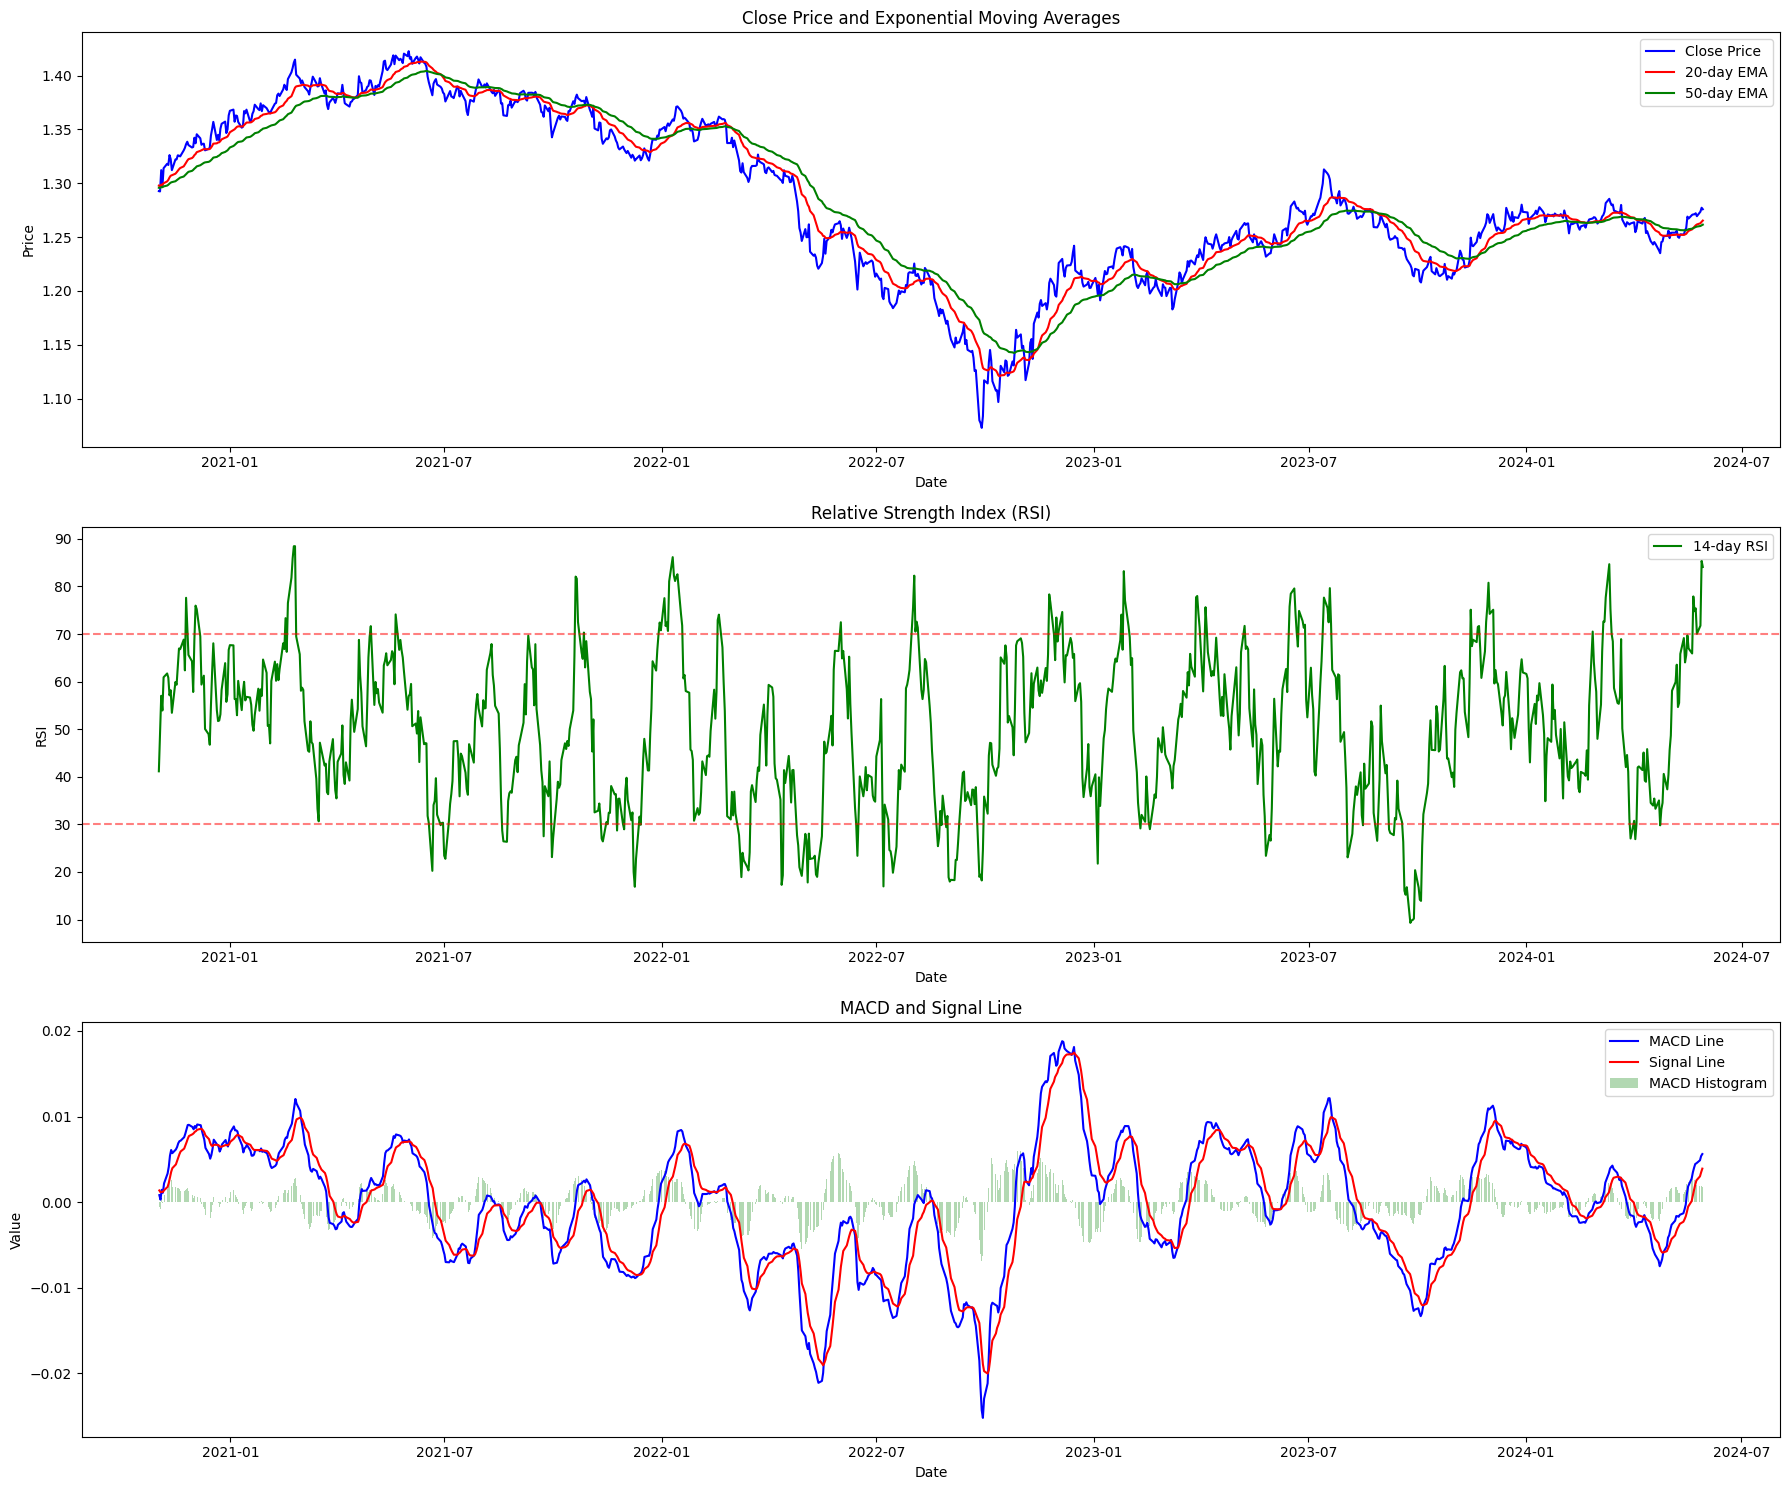

In [ ]:
# Plot the Close price, EMAs, RSI, and MACD
plt.figure(figsize=(18, 15))

# Close Price and EMAs
plt.subplot(3, 1, 1)
plt.plot(filtered_data.Date, filtered_data['Close'], label='Close Price', color='blue')
plt.plot(filtered_data.Date, filtered_data['EMA_20'], label='20-day EMA', color='red')
plt.plot(filtered_data.Date, filtered_data['EMA_50'], label='50-day EMA', color='green')
plt.title('Close Price and Exponential Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

# RSI
plt.subplot(3, 1, 2)
plt.plot(filtered_data.Date, filtered_data['RSI'], label='14-day RSI', color='green')
plt.axhline(30, linestyle='--', alpha=0.5, color='red')
plt.axhline(70, linestyle='--', alpha=0.5, color='red')
plt.title('Relative Strength Index (RSI)')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.legend()

# MACD
plt.subplot(3, 1, 3)
plt.plot(filtered_data.Date, filtered_data['MACD_Line'], label='MACD Line', color='blue')
plt.plot(filtered_data.Date, filtered_data['Signal_Line'], label='Signal Line', color='red')
plt.bar(filtered_data.Date, filtered_data['MACD_Histogram'], label='MACD Histogram', color='green', alpha=0.3)
plt.title('MACD and Signal Line')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()

plt.tight_layout()
plt.show()

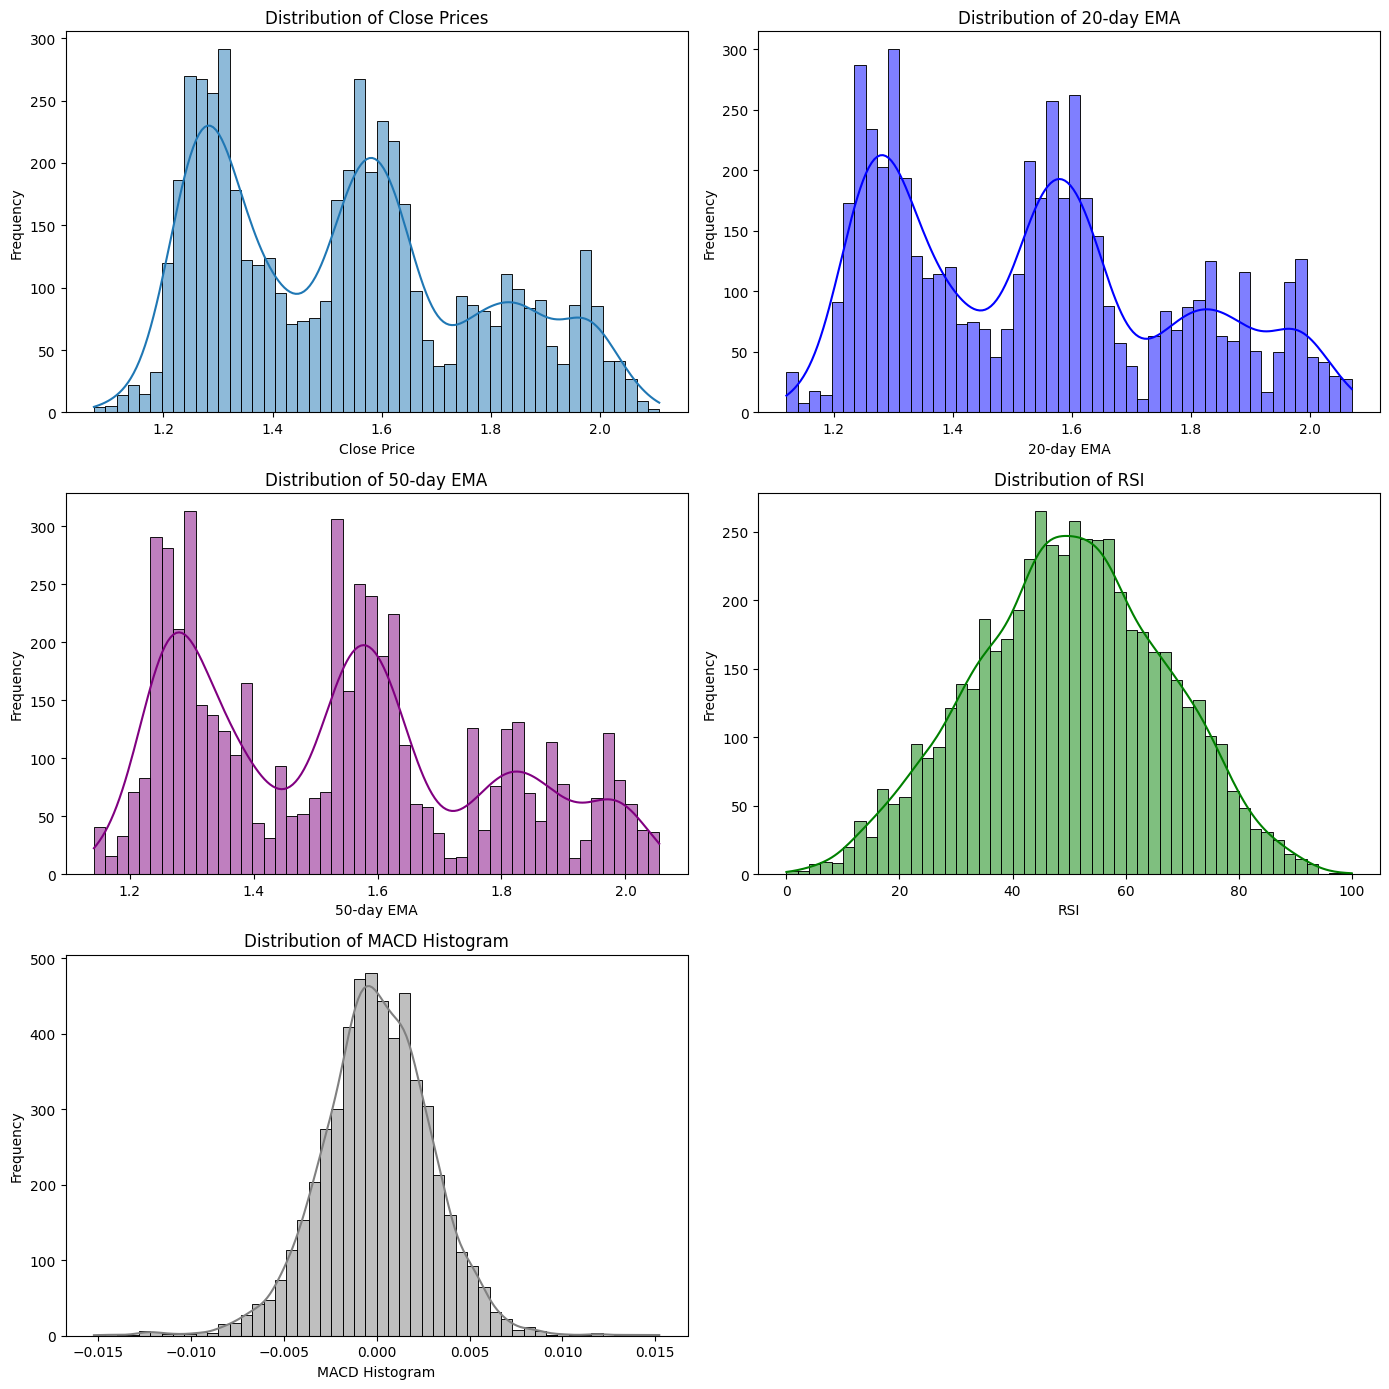

In [ ]:
# Creating a 3x2 grid of subplots
fig, axes = plt.subplots(3, 2, figsize=(14, 14))

# Distribution of Close Prices
sns.histplot(fx_cleaned_df2['Close'], bins=50, kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Close Prices')
axes[0, 0].set_xlabel('Close Price')
axes[0, 0].set_ylabel('Frequency')

# Distribution of 50-day EMA
sns.histplot(fx_cleaned_df2['EMA_20'], bins=50, kde=True, color='blue', ax=axes[0, 1])
axes[0, 1].set_title('Distribution of 20-day EMA')
axes[0, 1].set_xlabel('20-day EMA')
axes[0, 1].set_ylabel('Frequency')

# Distribution of 200-day EMA
sns.histplot(fx_cleaned_df2['EMA_50'], bins=50, kde=True, color='purple', ax=axes[1, 0])
axes[1, 0].set_title('Distribution of 50-day EMA')
axes[1, 0].set_xlabel('50-day EMA')
axes[1, 0].set_ylabel('Frequency')

# Distribution of RSI
sns.histplot(fx_cleaned_df2['RSI'], bins=50, kde=True, color='green', ax=axes[1, 1])
axes[1, 1].set_title('Distribution of RSI')
axes[1, 1].set_xlabel('RSI')
axes[1, 1].set_ylabel('Frequency')

# Distribution of MACD Histogram
sns.histplot(fx_cleaned_df2['MACD_Histogram'], bins=50, kde=True, color='grey', ax=axes[2, 0])
axes[2, 0].set_title('Distribution of MACD Histogram')
axes[2, 0].set_xlabel('MACD Histogram')
axes[2, 0].set_ylabel('Frequency')

# Removes the empty subplot
fig.delaxes(axes[2, 1])

# Adjust layout
plt.tight_layout()
plt.show()

In [ ]:
# Summary Statistics
fx_cleaned_df2.describe()

,Date,Open,High,Low,Close,EMA_20,EMA_50,RSI,MACD_Line,Signal_Line,MACD_Histogram
count,5330,5330.000000,5330.000000,5330.000000,5330.000000,5330.000000,5330.000000,5330.000000,5330.000000,5330.000000,5330.000000
mean,2014-03-05 00:17:01.238273792,1.534178,1.539934,1.528196,1.534216,1.535024,1.536317,49.980568,-0.000603,-0.000606,0.000003
min,2003-12-01 00:00:00,1.072846,1.083541,1.037904,1.072754,1.120575,1.142428,0.000000,-0.059307,-0.055333,-0.015220
25%,2009-01-23 18:00:00,1.309934,1.314298,1.305458,1.309989,1.309257,1.306019,38.382537,-0.005958,-0.005691,-0.001784
50%,2014-03-08 12:00:00,1.536098,1.542615,1.530397,1.536134,1.536795,1.539070,50.196525,0.000041,0.000051,-0.000002
75%,2019-04-18 18:00:00,1.681011,1.684409,1.678465,1.680997,1.682355,1.681341,61.905743,0.005701,0.005409,0.001887
max,2024-05-29 00:00:00,2.108415,2.115820,2.098812,2.108192,2.070346,2.054503,100.000000,0.038755,0.033321,0.015213
std,NaN,0.239760,0.240494,0.239159,0.239793,0.238818,0.237261,16.854668,0.010082,0.009511,0.002991


In [ ]:
# Correlation of matrix for key columns
correlation_matrix = fx_cleaned_df2[['Open', 'High', 'Low', 'Close', 'EMA_20', 'EMA_50', 'RSI', 'MACD_Line', 'Signal_Line', 'MACD_Histogram']].corr()
print(correlation_matrix)

                    Open      High       Low     Close    EMA_20    EMA_50  \
Open            1.000000  0.999731  0.999652  0.999656  0.997168  0.991869   
High            0.999731  1.000000  0.999552  0.999708  0.997116  0.992076   
Low             0.999652  0.999552  1.000000  0.999688  0.996668  0.991066   
Close           0.999656  0.999708  0.999688  1.000000  0.996873  0.991498   
EMA_20          0.997168  0.997116  0.996668  0.996873  1.000000  0.997689   
EMA_50          0.991869  0.992076  0.991066  0.991498  0.997689  1.000000   
RSI             0.087082  0.087811  0.089988  0.090722  0.027064 -0.001782   
MACD_Line       0.123865  0.121395  0.127447  0.125572  0.064112  0.003237   
Signal_Line     0.132782  0.129823  0.135864  0.133540  0.086521  0.021655   
MACD_Histogram -0.004688 -0.003607 -0.002412 -0.001345 -0.059010 -0.057946   

                     RSI  MACD_Line  Signal_Line  MACD_Histogram  
Open            0.087082   0.123865     0.132782       -0.004688  
High   

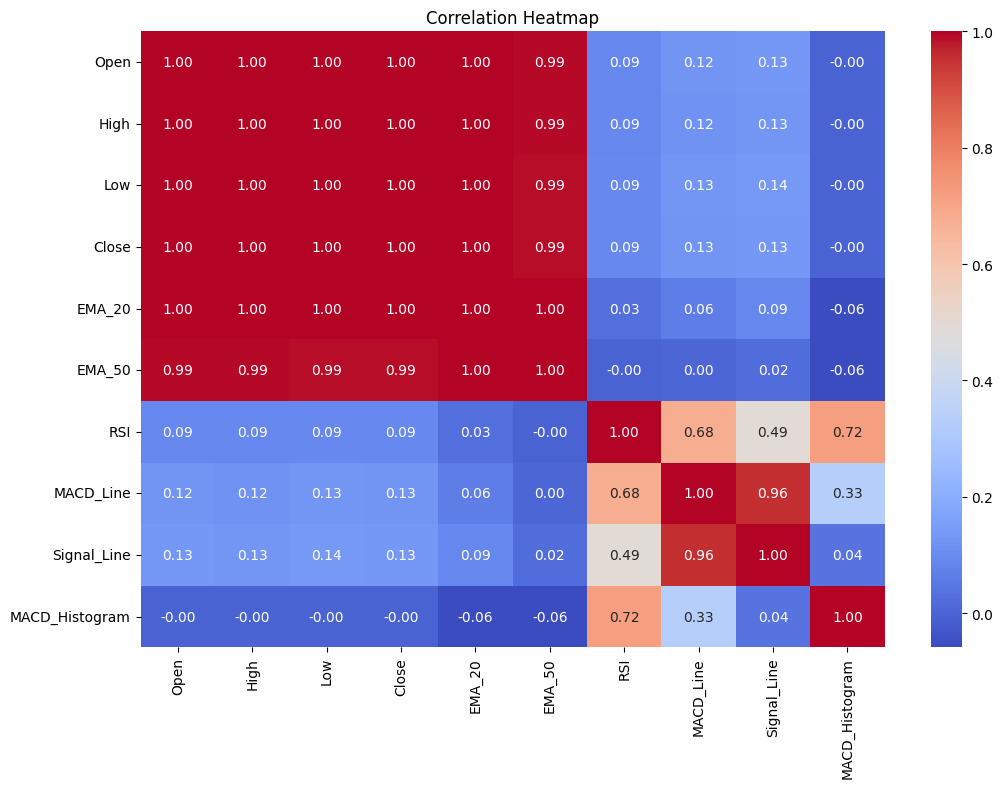

In [ ]:
# Plot correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()